<a href="https://colab.research.google.com/github/snakeway8/Coffee_EDA/blob/main/literacy_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://drive.google.com/file/d/1b9rBMey-nD-doSywNwltWuF0LfdlUoO0/view?usp=sharing

In [ ]:
! gdown --id 1b9rBMey-nD-doSywNwltWuF0LfdlUoO0

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1b9rBMey-nD-doSywNwltWuF0LfdlUoO0
To: /content/literacy.zip
100% 51.7k/51.7k [00:00<00:00, 28.9MB/s]


In [ ]:
! unzip /content/literacy.zip

Archive:  /content/literacy.zip
  inflating: Literacy rates (no pw2).csv  


In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/Literacy rates (no pw2).csv')

In [ ]:
df.head()

,index,Region,Country,Year,Age,Gender,Literacy rate
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791


In [ ]:
df['Country'].nunique()

155

In [ ]:
df.describe()

,index,Year,Literacy rate
count,4955.000000,4955.000000,4955.000000
mean,2477.000000,2013.987891,0.816947
std,1430.529622,2.746204,0.232560
min,0.000000,2010.000000,0.004025
25%,1238.500000,2011.000000,0.722507
50%,2477.000000,2014.000000,0.930676
75%,3715.500000,2016.000000,0.985078
max,4954.000000,2018.000000,1.000000


In [ ]:
df['Gender'].value_counts(dropna = False)

female    1652
total     1652
male      1651
Name: Gender, dtype: int64

In [ ]:
df.isna().mean().sort_values(ascending = False)

index            0.0
Region           0.0
Country          0.0
Year             0.0
Age              0.0
Gender           0.0
Literacy rate    0.0
dtype: float64

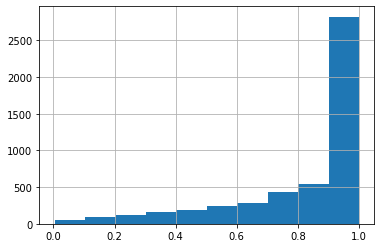

In [ ]:
df['Literacy rate'].hist()

In [ ]:
t = df['Literacy rate'].quantile(0.25)

In [ ]:
t

0.7225069

In [ ]:
len(df[df['Literacy rate']< t])/ len(df)

0.250050454086781

In [ ]:
t1 = df['Literacy rate'].quantile(0.3)

In [ ]:
t2 = df['Literacy rate'].quantile(0.8)

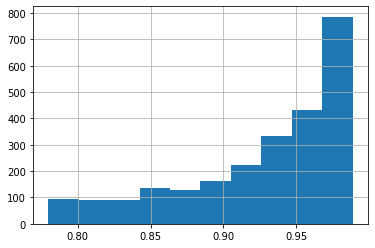

In [ ]:
df[df['Literacy rate'].between(t1,t2)]['Literacy rate'].hist()

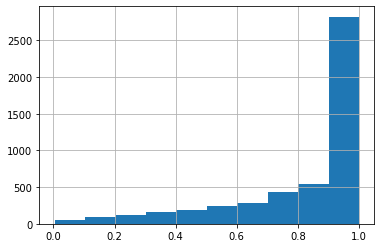

In [ ]:
df['Literacy rate'].hist()

In [ ]:
len(df)

4955

In [ ]:
df['Literacy rate'].mean()

0.8169465862159435

In [ ]:
t=df.groupby('Gender')['Literacy rate'].agg(['count','mean'])

In [ ]:
t['count'].sum()

4955

In [ ]:
df.groupby(['Age','Gender'])['Literacy rate'].agg(['count','mean'])

count      mean
Age   Gender                 
15+   female    420  0.823957
      male      420  0.882689
      total     420  0.852844
15-24 female    413  0.910502
      male      413  0.928064
      total     413  0.918978
25-64 female    413  0.811954
      male      413  0.876286
      total     413  0.843378
65+   female    406  0.573463
      male      405  0.726284
      total     406  0.644309

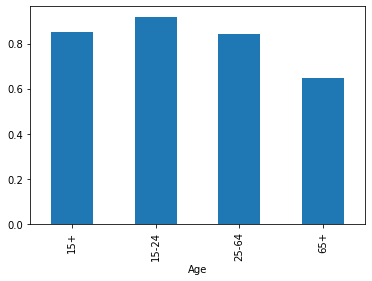

In [ ]:
df.groupby('Age')['Literacy rate'].mean().plot(kind= 'bar')

In [ ]:
df['year_group1']=pd.cut(df.Year, bins=[2009,
                      2012,
                      2015,
                      2018]
       )

In [ ]:
df['year_group']= pd.qcut(df['Year'],3)

In [ ]:
df.groupby('year_group1')['Literacy rate'].agg(['count','mean'])

,count,mean
year_group1,,
"(2009, 2012]",1799,0.812286
"(2012, 2015]",1530,0.820486
"(2015, 2018]",1626,0.818773


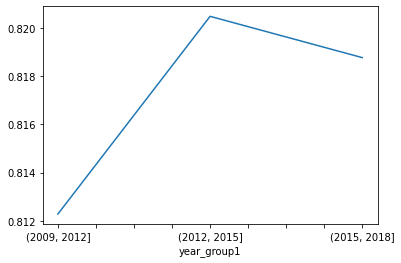

In [ ]:
df.groupby('year_group1')['Literacy rate'].mean().plot()

In [ ]:
df

,index,Region,Country,Year,Age,Gender,Literacy rate,year_group1,year_group
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121,"(2009, 2012]","(2009.999, 2012.0]"
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171,"(2009, 2012]","(2009.999, 2012.0]"
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411,"(2009, 2012]","(2009.999, 2012.0]"
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132,"(2009, 2012]","(2009.999, 2012.0]"
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791,"(2009, 2012]","(2009.999, 2012.0]"
...,...,...,...,...,...,...,...,...,...
4950,4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255,"(2012, 2015]","(2012.0, 2015.0]"
4951,4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.887874,"(2012, 2015]","(2012.0, 2015.0]"
4952,4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258,"(2012, 2015]","(2012.0, 2015.0]"
4953,4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.927231,"(2012, 2015]","(2012.0, 2015.0]"


In [ ]:
df[['Year','Literacy rate']].corr()

,Year,Literacy rate
Year,1.000000,-0.000116
Literacy rate,-0.000116,1.000000


In [ ]:
! pip install phik

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 679 kB 7.0 MB/s 


In [ ]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

In [ ]:
phik_overview=df[['Country','Region','Year','Age', 'Gender','Literacy rate']].phik_matrix()

interval columns not set, guessing: ['Year', 'Literacy rate']


In [ ]:
phik_overview

,Country,Region,Year,Age,Gender,Literacy rate
Country,1.000000,1.000000,0.868983,0.000000,0.000000,0.741973
Region,1.000000,1.000000,0.300415,0.000000,0.000000,0.433791
Year,0.868983,0.300415,1.000000,0.000000,0.000000,0.081949
Age,0.000000,0.000000,0.000000,1.000000,0.000000,0.411033
Gender,0.000000,0.000000,0.000000,0.000000,1.000000,0.198217
Literacy rate,0.741973,0.433791,0.081949,0.411033,0.198217,1.000000


In [ ]:
import seaborn as sns

In [ ]:

%matplotlib inline

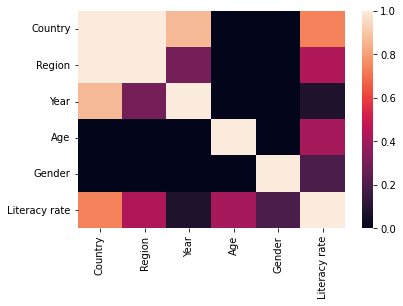

In [ ]:
sns.heatmap(phik_overview)

In [ ]:
phik_overview['Literacy rate'].sort_values(ascending= False)

Literacy rate    1.000000
Country          0.741973
Region           0.433791
Age              0.411033
Gender           0.198217
Year             0.081949
Name: Literacy rate, dtype: float64

In [ ]:
df.groupby(['Country', 'Age'])['Literacy rate'].mean().sort_values(ascending= False).head(10)

Country     Age  
San Marino  15-24    1.000000
Uzbekistan  15-24    1.000000
            25-64    1.000000
            15+      0.999865
Ukraine     25-64    0.999818
San Marino  25-64    0.999777
Ukraine     15+      0.999755
            15-24    0.999699
            65+      0.999599
Estonia     15-24    0.999491
Name: Literacy rate, dtype: float64

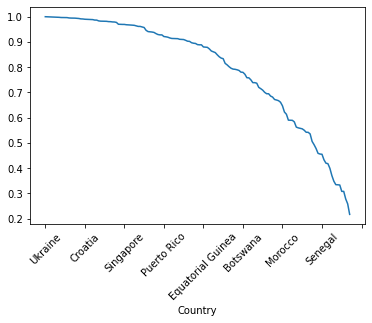

In [ ]:
df.groupby('Country')['Literacy rate'].mean().sort_values(ascending= False).plot(rot=45)

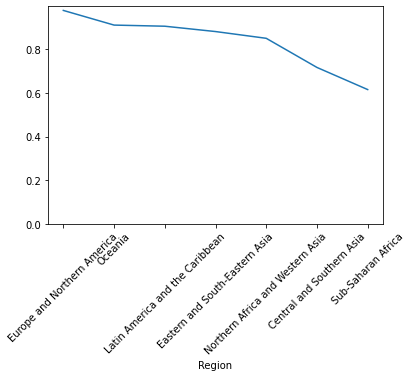

In [ ]:
df.groupby('Region')['Literacy rate'].mean().sort_values(ascending= False).plot(rot=45,ylim=0)

In [ ]:
df.groupby(['Age'])['Literacy rate'].agg(['count','mean'])

,count,mean
Age,,
15+,1260,0.853163
15-24,1239,0.919181
25-64,1239,0.843873
65+,1217,0.647954


In [ ]:
t = df.groupby('Country')['Literacy rate'].agg(['count', 'mean'])

In [ ]:
t

,count,mean
Country,,
Afghanistan,23,0.348213
Albania,36,0.961329
Algeria,12,0.738561
Angola,12,0.589339
Antigua and Barbuda,6,0.989233
...,...,...
Vanuatu,24,0.786895
Venezuela (Bolivarian Republic of),36,0.940016
Viet Nam,12,0.939029


In [ ]:
t.sort_values('count', ascending = False).head(60)

,count,mean
Country,,
Uruguay,108,0.982070
Mexico,108,0.913359
Brazil,108,0.894710
Ecuador,96,0.902701
Palestine,96,0.878407
Turkey,96,0.920212
Honduras,96,0.814934
Argentina,96,0.988975
Spain,96,0.977140


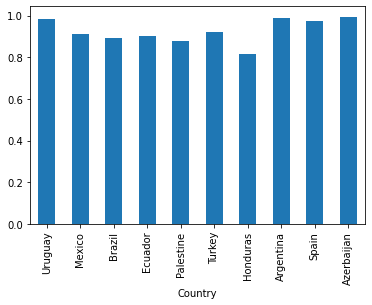

In [ ]:
t.sort_values('count', ascending = False).head(10)['mean'].plot(kind= 'bar')

In [ ]:
df.groupby(['Age'])['Literacy rate'].agg(['count','mean'])

,count,mean
Age,,
15+,1260,0.853163
15-24,1239,0.919181
25-64,1239,0.843873
65+,1217,0.647954


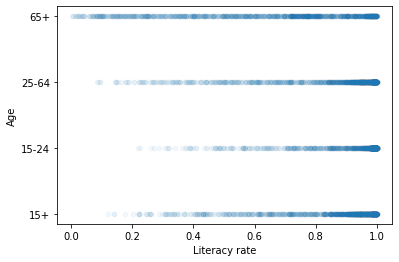

In [ ]:
df.plot(x='Literacy rate', y='Age', kind= 'scatter', alpha=0.05)

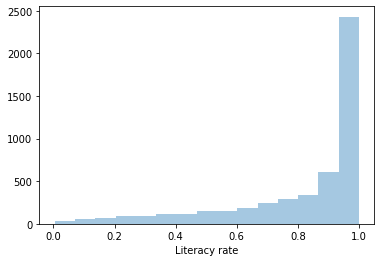

In [ ]:
sns.distplot(df['Literacy rate'], kde=False, bins= 15)

In [ ]:
df

,index,Region,Country,Year,Age,Gender,Literacy rate
0,0,Central and Southern Asia,Afghanistan,2011,15+,female,0.176121
1,1,Central and Southern Asia,Afghanistan,2011,15+,male,0.454171
2,2,Central and Southern Asia,Afghanistan,2011,15+,total,0.317411
3,3,Central and Southern Asia,Afghanistan,2011,15-24,female,0.321132
4,4,Central and Southern Asia,Afghanistan,2011,15-24,male,0.618791
...,...,...,...,...,...,...,...
4950,4950,Sub-Saharan Africa,Zimbabwe,2014,25-64,male,0.897255
4951,4951,Sub-Saharan Africa,Zimbabwe,2014,25-64,total,0.887874
4952,4952,Sub-Saharan Africa,Zimbabwe,2014,65+,female,0.734258
4953,4953,Sub-Saharan Africa,Zimbabwe,2014,65+,male,0.927231


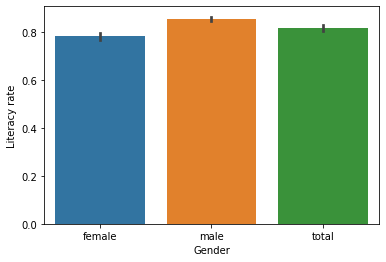

In [ ]:
sns.barplot(x ='Gender', y ='Literacy rate', data= df)